In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import math

%matplotlib inline

In [2]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [3]:
torch.manual_seed(3)
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [5]:
class IrisDataset(Dataset):
    def __init__(self):
        df = pd.read_csv('iris.csv')
        X = df.drop('target', axis=1).values
        y = df['target'].values

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        self.x_data = torch.FloatTensor(X_train)
        self.x_test = torch.FloatTensor(X_test)
        self.y_data = torch.LongTensor(y_train)
        self.y_test = torch.LongTensor(y_train)

        self.datalen = len(self.y_data)

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.datalen

In [6]:
Batch_Size = 20
dataset = IrisDataset()
trainloader = DataLoader(dataset=dataset, batch_size=Batch_Size, shuffle=True)

In [9]:
epochs = 100
loss_list = []
total_samples = len(dataset)
print(total_samples)
n_iterations = math.ceil(total_samples/Batch_Size)
print(n_iterations)

120
6


In [10]:
for epoch in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        print(f'Epoch:{epoch+1}/{epochs}, Iteration {i+1}/{n_iterations}, Inputs {inputs.shape}, Labels {labels.shape}')
        y_pred = model.forward(inputs.data)
        loss = criterion(y_pred, labels.data)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_list.append(loss.detach())

Epoch:1/100, Iteration 1/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:1/100, Iteration 2/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:1/100, Iteration 3/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:1/100, Iteration 4/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:1/100, Iteration 5/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:1/100, Iteration 6/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:2/100, Iteration 1/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:2/100, Iteration 2/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:2/100, Iteration 3/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:2/100, Iteration 4/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:2/100, Iteration 5/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:2/100, Iteration 6/6, Inputs torch.Size([20, 4]), Labels torch.Size([20])
Epoch:3/100, Iteration 1/6, Inputs torch

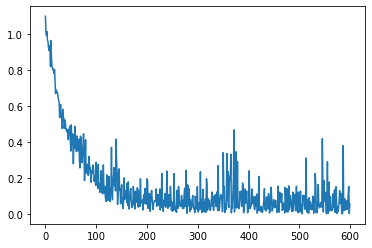

In [11]:
plt.plot(loss_list)